In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


In [32]:
data_dir = "../raw_data/images_png/"


In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 376),
  batch_size=32,
  color_mode = "grayscale")


Found 38044 files belonging to 34 classes.
Using 30436 files for training.


In [34]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 376),
  batch_size=32,
  color_mode = "grayscale")


Found 38044 files belonging to 34 classes.
Using 7608 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)


['banswa', 'barswa', 'calqua', 'cangoo', 'caster1', 'comloo', 'comrav', 'comred', 'comter', 'eargre', 'eucdov', 'eursta', 'gadwal', 'gnwtea', 'goleag', 'greegr', 'hergul', 'horlar', 'houspa', 'mallar3', 'merlin', 'norsho', 'osprey', 'pecsan', 'perfal', 'redcro', 'ribgul', 'rinduc', 'rocpig', 'rudduc', 'sheowl', 'silence', 'snobun', 'tunswa']


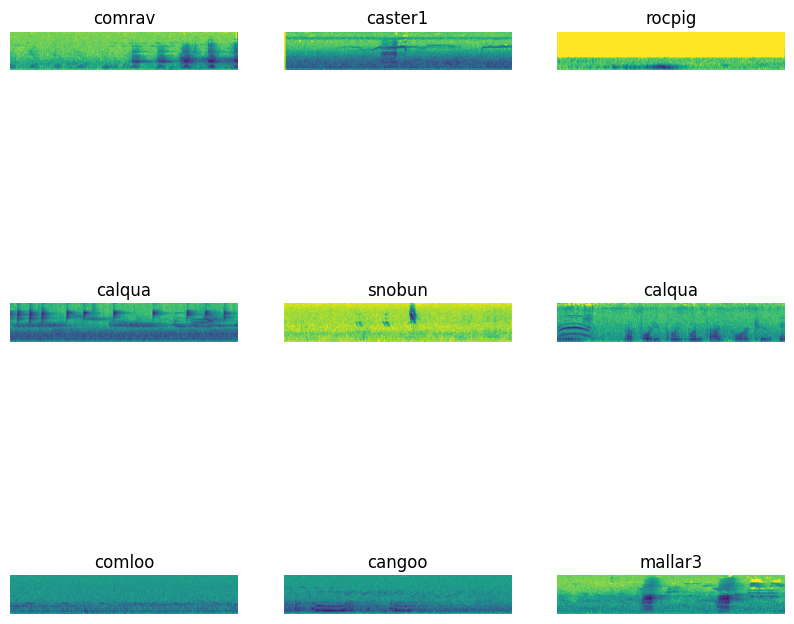

In [36]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [37]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(64, 376, 1)),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [38]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 376, 1)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 376, 16)       32        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 188, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 188, 32)       544       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 94, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 94, 64)       

In [39]:
epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


952/952 [==============================] - 169s 176ms/step - loss: 2.7346 - accuracy: 0.2591 - val_loss: 2.4285 - val_accuracy: 0.3390
